In [287]:
import numpy as np
from scipy. integrate import odeint
import matplotlib.pyplot as plt
import sys, csv, openpyxl, copy
from IPython.display import display, Math

In [268]:
# lambda_A = 5
# lambda_B = 5
# N_A = 2
# N_B = 2
# R_A = 1
# R_B = 2
# min_A = 1
# min_B = N_B

# switch = [[N_A, N_B], [R_A, R_B]]

In [269]:
# def get_switch(index, tmp_sw):
#     tmp_switch = copy.deepcopy(tmp_sw)
    
#     tmp_switch[1][index] -= 1
    
#     # display("После изменения индекса", tmp_switch)
    
#     if tmp_switch[1][index] < 0:
#         tmp_switch[0][index] -= 1
#         tmp_switch[1][index] = 0
        
#     # display("Корректировка индекса", tmp_switch)
    
#     status = True
#     if tmp_switch[0][0] < min_A or tmp_switch[0][1] < min_B:
#         status = False
        
#     # display("возврат индекса", tmp_switch)
    
#     return [tmp_switch[0], tmp_switch[1], status]

In [270]:

# count = 1
# status = [[copy.deepcopy(switch[0]), copy.deepcopy(switch[1]), True]]
# display(N_A + R_A - min_A + N_B + R_B - min_B + 1)
# for i in range(N_A + R_A - min_A + N_B + R_B - min_B + 2):
#     for j in range((i+1) * 2):
#         print("i", i, "j", j, "count", count, "index", count - (i - j) - 1)
#         status.append(get_switch(0, status[count - (i - j) - 1]))
#         print("i", i, "j", j, "count", count, "index", count - (i - j) - 2)
#         status.append(get_switch(1, status[count - (i - j) - 2]))
#         count += 2
        


# new_status = []
# for item in status:
#     if item not in new_status:
#         new_status.append(item)

# for i in range(len(new_status)):
#     print(i, new_status[i])

In [291]:
import numpy as np

def matrix_to_latex(matrix, fmt=".2f", zero_tol=1e-12):
    rows = []
    for row in matrix:
        formatted_row = " & ".join(
            "0" if abs(val) < zero_tol else format(val, fmt) for val in row
        )
        rows.append(formatted_row)
    body = " \\\\\n".join(rows)
    latex_str = "\\begin{bmatrix}\n" + body + "\n\\end{bmatrix}"
    return latex_str


In [271]:

wb = openpyxl.load_workbook("intense_matrix.xlsx")
ws = wb.active

intense_matrix = []

for row in ws.iter_rows(values_only=True):
    intense_matrix.append([i for i in row])
    
intense_matrix = np.array(intense_matrix)

display(intense_matrix)
len_matrix = len(intense_matrix)

kolmagorova_matrix = np.zeros((len_matrix, len_matrix))

for i in range(len_matrix):
    for j in range(len_matrix):        
        kolmagorova_matrix[i][i] -= intense_matrix[i][j]
        kolmagorova_matrix[j][i] += intense_matrix[i][j]
            
display(kolmagorova_matrix)

lambda_A = 5
lambda_B = 5

array([[ 0, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10, 10,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0

array([[-20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [ 10., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [ 10.,   0., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,  10.,   0., -20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,  10.,  10.,   0., -20.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,  10.,   0.,   0., -15.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  10.,  10.,   0.,   0., -20.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  10.,  10.,   0.,   0., -15.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,

In [272]:
def dpdt(p, t):
    return np.dot(kolmagorova_matrix, p)

In [273]:
t = np.linspace( 0, 1, 100)

p0 = np.zeros(len(intense_matrix))
p0[0] = 1
p = odeint(dpdt, p0, t)

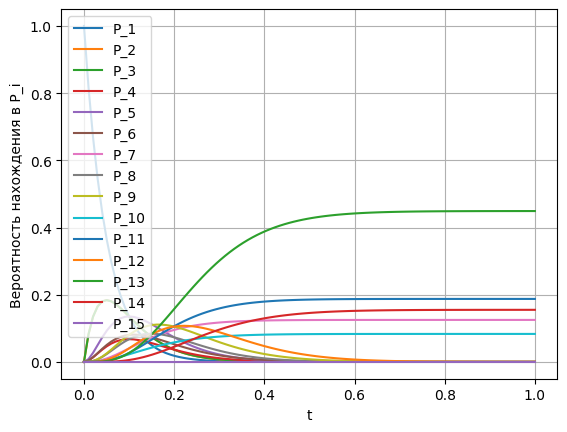

In [274]:
for i in range(len(p[0])):
    plt.plot(t, p[:,i], '-', label=f"P_{i+1}")
plt.ylabel("Вероятность нахождения в P_i")
plt.xlabel("t")
plt.grid(True)
plt.legend()
plt.show()

In [275]:
broken = [7, 11, 14, 15, 13, 10]

p_work = []

for i in range(len(p)):
    sum = 0
    for j in range(len(p[0])):
        if j + 1 not in broken:
            sum += p[i][j]
    p_work.append(sum)

mean_uptime = np.trapezoid(p_work, t)

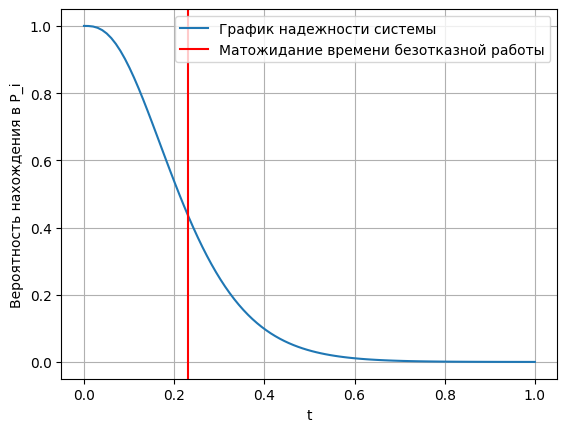

In [310]:
plt.plot(t, p_work, '-', label="График надежности системы")
plt.axvline(mean_uptime, color="red", linestyle='-', label="Матожидание времени безотказной работы")
plt.ylabel("Вероятность нахождения в P_i")
plt.xlabel("t")
plt.grid(True)
plt.legend()
plt.show()

In [282]:
mark_matrix = np.zeros((len_matrix, len_matrix))

for i in range(len_matrix):
    for j in range(len_matrix):
        if intense_matrix[i][j]:
            mark_matrix[i][j] = intense_matrix[i][j]/np.sum(intense_matrix[i])

In [290]:
display(Math(matrix_to_latex(mark_matrix)))

<IPython.core.display.Math object>

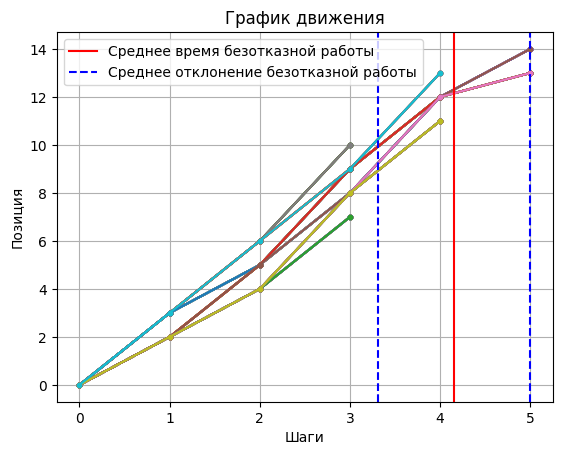

In [315]:
imitation_cnt = 100
position_entry_matrix = []
uptimes = []

program_entry_matrix = np.zeros((len_matrix, len_matrix))
for i in range(len_matrix):
    program_entry_matrix[i][0] = mark_matrix[i][0]
    for j in range(1, len_matrix):
        program_entry_matrix[i][j] = program_entry_matrix[i][j-1] + mark_matrix[i][j]


for i in range(imitation_cnt):
    start_position = 0
    
    current_position = start_position
    prev_position = -1
    
    position_history = [[0, int(start_position)]]
    position_entry = {}
    
    uptime = 0
    
    j = 0
    while current_position + 1 not in broken:
        current_prob = np.random.default_rng(i*imitation_cnt + j).integers(1,100)/100
        next_position = 0
        while current_prob > program_entry_matrix[current_position][next_position]:
            next_position += 1
        
        prev_position = current_position
        current_position = next_position
        position_entry[current_position] = position_entry.get(current_position, 0) + 1

        position_history.append([j + 1, current_position + 1])
        
        j += 1
        uptime += 1
    
    steps, positions = zip(*position_history)
    plt.plot(steps, positions, marker='.', linestyle='-')
    
    uptimes.append(uptime)
    
mean_uptime_mark = np.mean(uptimes)
std_uptime_mark = np.std(uptimes)
    
plt.axvline(mean_uptime_mark, color="red", linestyle='-', label="Среднее время безотказной работы")
plt.axvline(mean_uptime_mark-std_uptime_mark, color="blue", linestyle='--', label="Среднее отклонение безотказной работы")
plt.axvline(mean_uptime_mark+std_uptime_mark, color="blue", linestyle='--')



plt.xlabel("Шаги")
plt.ylabel("Позиция")
plt.title("График движения")
plt.legend()
plt.grid(True)
plt.show()

    # position_entry_matrix.append([[i], [position_entry[k] for k in range(len(position_entry))]])

    